In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/content-SHAI/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## 1- Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [37]:
df.shape

(148654, 13)

## 2- Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [39]:
descriptionStats = df['BasePay'].describe()

# Calculate mode
mode_value = df['BasePay'].mode()[0]

# Calculate range
range_value = descriptionStats['max'] - descriptionStats['min']
print(descriptionStats)
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")


count    148045.000000
mean      66325.448840
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64
Mode: 0.0
Range: 319441.02


##3-Data Cleaning: Handle missing data by suitable method with explain why you use it.

####After a detailed analysis of the statistics for the BasePay column in the dataset, I have chosen to employ median imputation as the method for addressing missing values. This decision is based on several key factors observed in the data:

Presence of Extreme Values: The BasePay column exhibits a negative minimum value (-166.01) and a very high maximum value (319275.01), indicating the presence of outliers. These extremes can significantly skew the mean, making mean imputation unreliable.

1. The mode of the distribution is 0.0, which suggests a concentration of values at this point. This might indicate that zeros could represent missing or unreported data.

2. Robustness of the Median, the median, as a measure of central tendency, is less sensitive to outliers and extreme values compared to the mean. In our case, the median is 65,007.45, providing a more representative replacement point for missing data in the context of base salary.

Considering these aspects, median imputation emerges as a more balanced and accurate approach to maintaining the integrity of the BasePay column's distribution in our dataset. This method allows us to mitigate the impact of outliers and effectively handle missing data without introducing significant biases.

In [40]:
print("Missing values in BasePay before imputation:", df['BasePay'].isnull().sum())
median_basepay = df['BasePay'].median()
df['BasePay'].fillna(median_basepay, inplace=True)
print("Missing values in BasePay after imputation:", df['BasePay'].isnull().sum())


Missing values in BasePay before imputation: 609
Missing values in BasePay after imputation: 0


### 4-Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

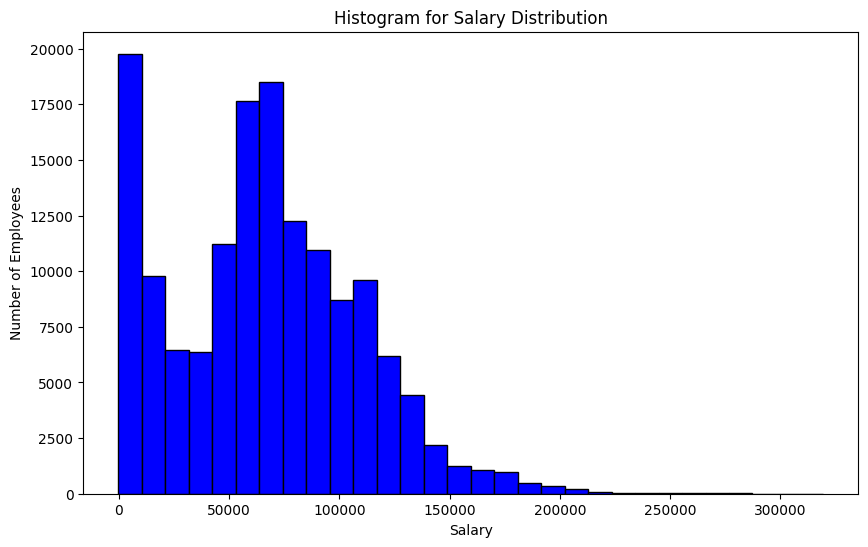

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(df['BasePay'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram for Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()


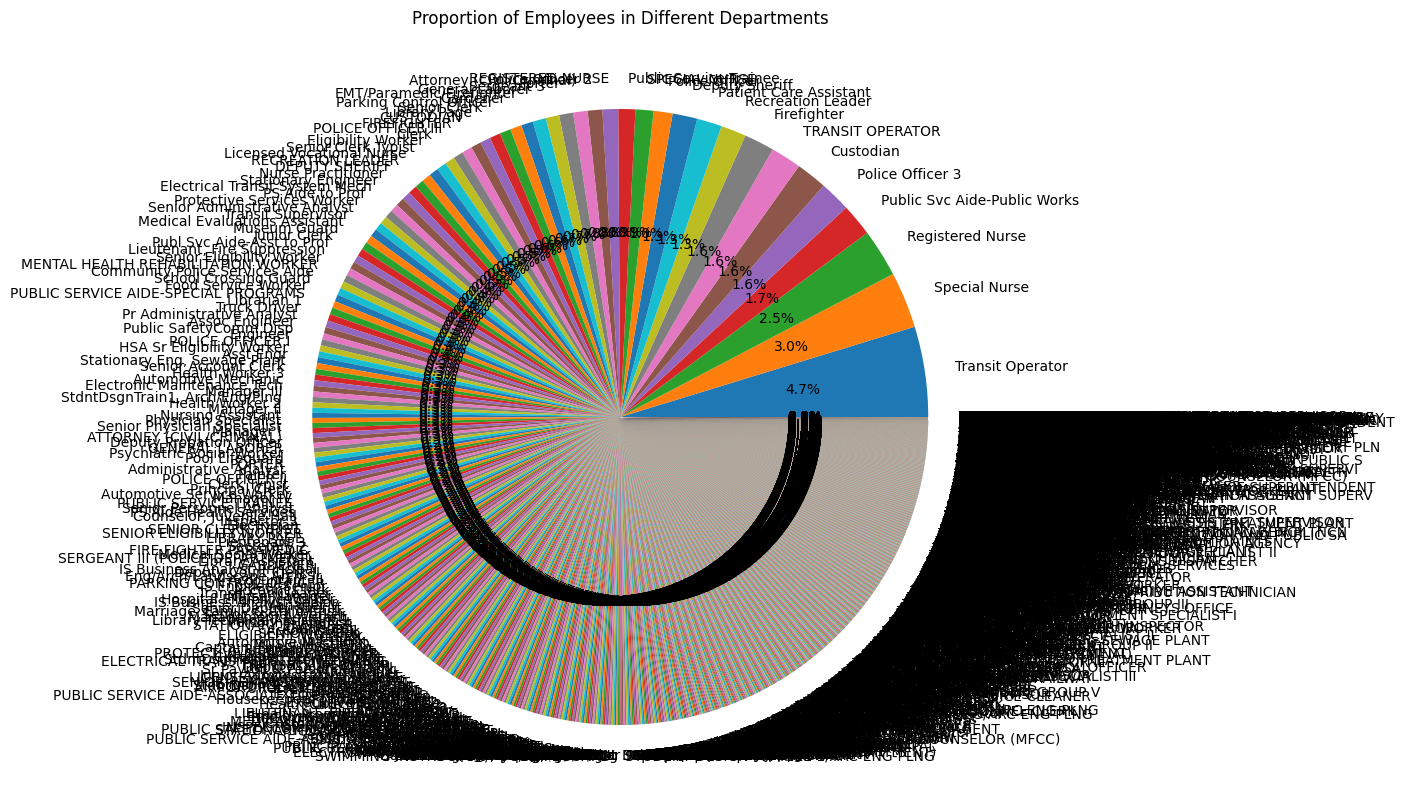

In [24]:
department_counts = df['JobTitle'].value_counts()
plt.figure(figsize=(10, 10))
department_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.ylabel('')
plt.show()


### 3-Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [42]:
# Group by the 'JobTitle' column
new_data = df.groupby('JobTitle')
# Display sammary  stats Salary for each JobTitle
summary_stats = new_data['BasePay'].agg(['mean', 'median', 'std', 'min', 'max'])
print(summary_stats)


                                                        mean     median  \
JobTitle                                                                  
ACCOUNT CLERK                                   43300.806506  49777.780   
ACCOUNTANT                                      46643.172000  60076.240   
ACCOUNTANT INTERN                               28732.663958  16806.755   
ACPO,JuvP, Juv Prob (SFERS)                     62290.780000  62290.780   
ACUPUNCTURIST                                   66374.400000  66374.400   
...                                                      ...        ...   
X-RAY LABORATORY AIDE                           47664.773077  54066.080   
X-Ray Laboratory Aide                           46086.387100  55251.635   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  52609.910000  52609.910   
Youth Comm Advisor                              39077.957500  42425.650   
ZOO CURATOR                                     43148.000000  43148.000   

                        

In [43]:
# Calculate the average salary for each JobTitle
avrg_salary = new_data['BasePay'].mean()
sorted_avrg_salary = avrg_salary.sort_values(ascending=False)
print(sorted_avrg_salary)

JobTitle
Chief of Police                            309767.683333
Chief, Fire Department                     304232.340000
Gen Mgr, Public Trnsp Dept                 297769.413333
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)     285262.000000
Dep Dir for Investments, Ret               276153.765000
                                               ...      
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN         0.000000
Conversion                                      0.000000
WAREHOUSE WORKER                                0.000000
RECREATION DIRECTOR                             0.000000
Cashier 3                                       0.000000
Name: BasePay, Length: 2159, dtype: float64


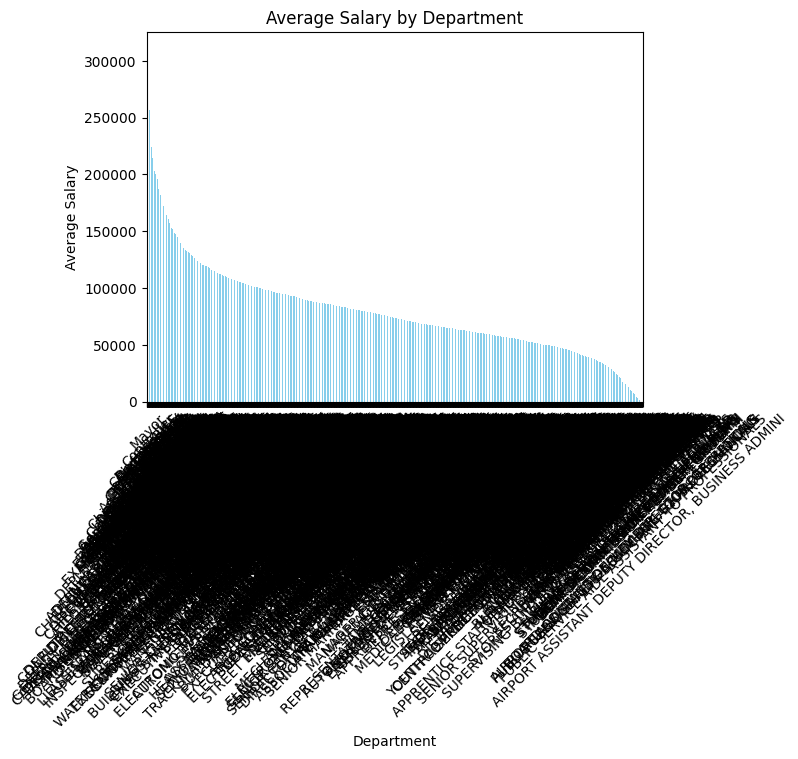

In [28]:
sorted_avrg_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


### 6-Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [29]:
correlation = df['BasePay'].corr(df['TotalPay'])
print(f"Correlation between BasePay and TotalPay: {correlation}")


Correlation between BasePay and TotalPay: 0.9506887197970231


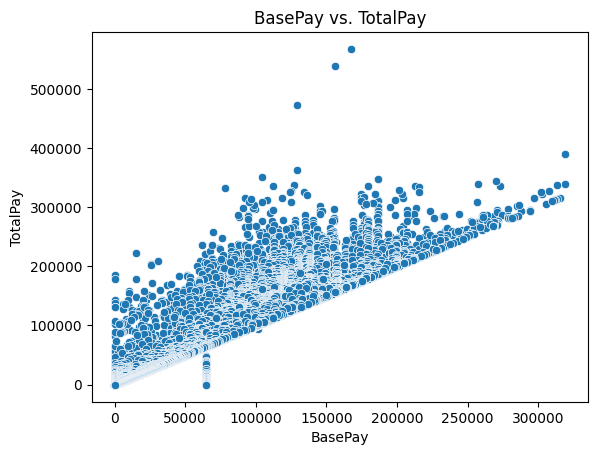

In [31]:

sns.scatterplot(x='BasePay', y='TotalPay', data=df)
plt.title('BasePay vs. TotalPay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()


###7 -Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.
The scatter  visualizes the relationship between BasePay and TotalPay. From the plot, there appears to be a positive correlation between these two variables: as BasePay increases, TotalPay also increases. This is expected because TotalPay would typically include BasePay along with other components such as overtime, and benefits.

Here are a few observations and explanations for the plot:

1. The data points indicating a positive linear relationship.
2. The denser cluster of points towards the lower end of the BasePay range suggests that there are more employees with lower base salaries than there are with higher base salaries.
3. There are some points that stray from the main cluster, extending towards the higher values of BasePay and TotalPay. These could represent employees with unusually high base pay or total compensation, possibly due to high overtime pay, bonuses, or other earnings.
4. BasePay increases, the spread in TotalPay also seems to increase. This could be because higher earners may have a more variable combination of bonuses and other types of pay.


In [44]:
correlation = df['BasePay'].corr(df['OvertimePay'])
print(f"Correlation between BasePay and OvertimePay: {correlation}")


Correlation between BasePay and OvertimePay: 0.2666884277979477


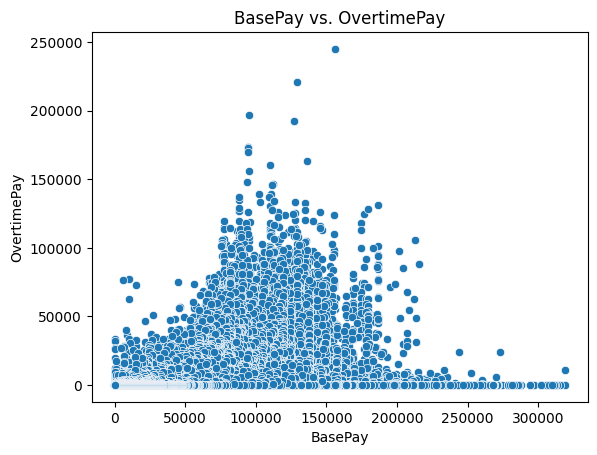

In [45]:
sns.scatterplot(x='BasePay', y='OvertimePay', data=df)
plt.title('BasePay vs. OvertimePay')
plt.xlabel('BasePay')
plt.ylabel('OvertimePay')
plt.show()


The scatter plot shows the relationship between BasePay and OvertimePay, with a correlation coefficient of approximately 0.267.
Here are some insights:
1. A correlation coefficient of 0.267 indicates a moderate positive relationship between BasePay and OvertimePay. As BasePay increases, there tends to be a general increase in OvertimePay, but the relationship is not strong.
2. The scatter plot shows a wide dispersion of OvertimePay across different levels of BasePay. Most of the data points are clustered at the lower end of BasePay, suggesting that overtime pay is more common among employees with lower base salaries.
3. The plot indicates high variability in OvertimePay across all levels of BasePay. Some employees with similar base pay have very different overtime payments, which could be due to differences in job roles, departments, or individual work circumstances.
4. There are some employees with high BasePay who also have high OvertimePay, but these are relatively few. This could suggest that higher-paid roles may not typically require as much overtime, or that these roles have a different compensation structure.

